   Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0         6        1266342                 41                      44   
1         6        1319353                 41                      44   
2         6            160                  1                       1   
3         6        1303488                 41                      42   
4         6             77                  1                       2   

   Fwd Packets Length Total  Bwd Packets Length Total  Fwd Packet Length Max  \
0                      2664                      6954                    456   
1                      2664                      6954                    456   
2                         0                         0                      0   
3                      2728                      6634                    456   
4                         0                         0                      0   

   Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  ...  \


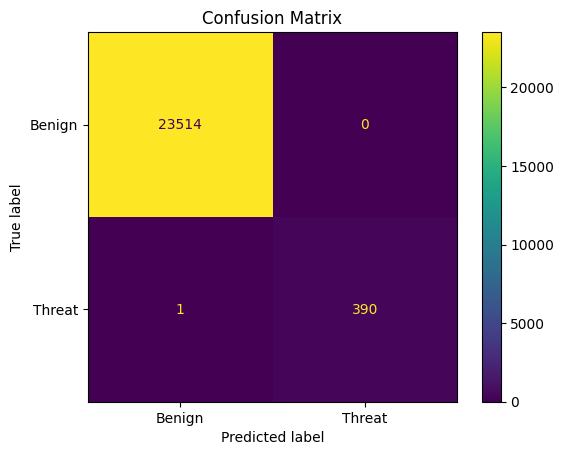

[INFO] Model saved to models/cyber_threat_rf_model.pkl


In [34]:
import pandas as pd
import joblib


def load_dataset():
    df = pd.read_csv("dataset/portscan-friday-no-metadata.csv")
    print(df.head())
    print("Shape:", df.shape)
    print(df.columns.tolist())
    return df

def preprocess_data(df):
    print("\n[INFO] Starting preprocessing...")

    # Convert 'Label' to binary: 0 for Benign, 1 for any type of attack
    df['Label'] = df['Label'].apply(lambda x: 0 if str(x).strip().lower() == 'benign' else 1)

    # Drop any missing values
    df = df.dropna()

    # Confirm if any non-numeric columns remain (and remove them)
    non_numeric = df.select_dtypes(include=['object']).columns
    if len(non_numeric) > 0:
        print(f"[INFO] Dropping non-numeric columns: {non_numeric.tolist()}")
        df = df.drop(columns=non_numeric)

    print("[INFO] Preprocessing complete.")
    print("New shape:", df.shape)
    print("Target value counts:\n", df['Label'].value_counts())

    return df

if __name__ == "__main__":
    df = load_dataset()
    df = preprocess_data(df)
    model, X_test, y_test = split_and_train(df)
    evaluate_model(model, X_test, y_test)
    joblib.dump(model, 'models/cyber_threat_rf_model.pkl')
    print("[INFO] Model saved to models/cyber_threat_rf_model.pkl")





In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def split_and_train(df):
    print("\n[INFO] Splitting data and training model...")

    X = df.drop('Label', axis=1)
    y = df['Label']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    print("[INFO] Model training complete.")
    return model, X_test, y_test


In [36]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test):
    print("\n[INFO] Evaluating model...")

    y_pred = model.predict(X_test)

    # Classification report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred, target_names=["Benign", "Threat"]))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Threat"])
    disp.plot(cmap=plt.cm.viridis)
    plt.title("Confusion Matrix")
    plt.show()
